In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "CSV_Files/Mouse_metadata.csv"
study_results_path = "CSV_Files/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

In [23]:
combined = pd.merge(study_results,mouse_metadata,  how='left', on='Mouse ID')
#combined.head(10)

In [24]:
mouse_count = combined["Mouse ID"].count()
#mouse_count

1893

In [27]:
duplicate_rows = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]
#duplicate_rows

In [46]:
new_df = combined.drop_duplicates("Mouse ID")
#new_df

In [50]:
combined.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [102]:
mean = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
#stats_df

In [105]:
drug_data = pd.DataFrame(combined.groupby(["Drug Regimen"]).count()).reset_index()
#drug_data
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
#drugs_df
drugs_df = drugs_df.set_index("Drug Regimen")
#drugs_df

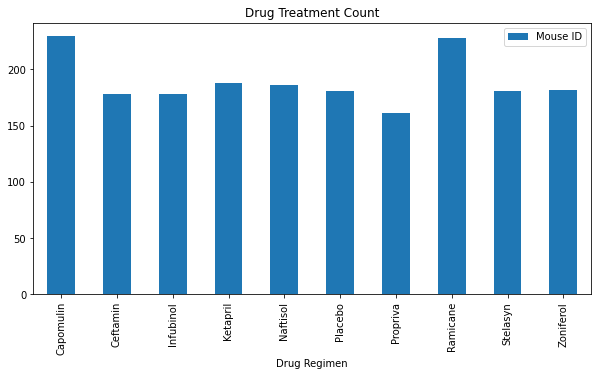

In [110]:
drugs_df.plot(kind="bar", figsize=(10,5))

plt.title("Drug Treatment Count")
plt.show()

In [115]:
drugs = summary_df.index.tolist()
#drug_list

In [121]:
drugs_count = (combined.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drugs_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [126]:
x_axis = np.arange(len(drug_count))
#x_axis

Text(0, 0.5, 'Count')

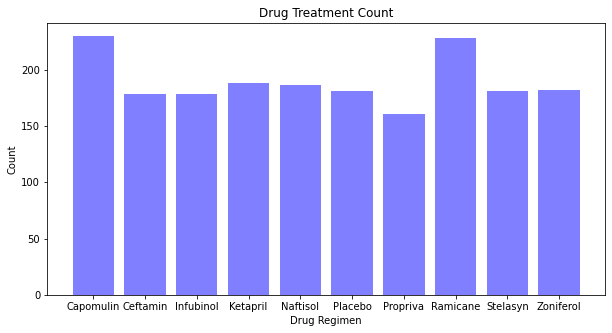

In [129]:
x_axis = drugs

plt.figure(figsize=(10,5))
plt.bar(x_axis, drugs_count, color='b', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [130]:
gender_df = pd.DataFrame(combined.groupby(["Sex"]).count()).reset_index()
#gender_df.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [131]:
gender_df = gender_df[["Sex","Mouse ID"]]
#gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

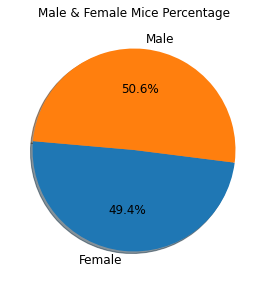

In [167]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1,  autopct='%1.1f%%',
              startangle=175, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=12)

plt.title("Male & Female Mice Percentage")
plt.ylabel("")

In [168]:
gender_count = (combined.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

In [169]:
labels = ["Females", "Males"]
colors = ["purple", "orange"]

(-1.1204027688464695,
 1.1101623948349095,
 -1.123672186820668,
 1.1099902256865237)

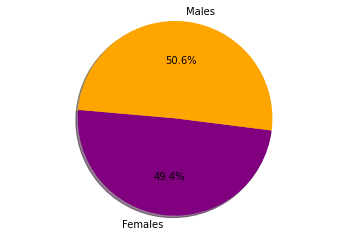

In [170]:
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=175)
plt.axis("equal")

In [173]:
sorted_df = combined.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
#last_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1764,b128,45,38.982878,2,Capomulin,Female,9,22
1,1829,b742,45,38.939633,0,Capomulin,Male,7,21
2,1777,g288,45,37.074024,1,Capomulin,Male,3,19
3,1791,g316,45,40.159220,2,Capomulin,Female,22,22
4,1878,i557,45,47.685963,1,Capomulin,Female,1,24


In [175]:
cap_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
cap_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1764,b128,45,38.982878,2,Capomulin,Female,9,22
1,1829,b742,45,38.939633,0,Capomulin,Male,7,21
2,1777,g288,45,37.074024,1,Capomulin,Male,3,19
3,1791,g316,45,40.159220,2,Capomulin,Female,22,22
4,1878,i557,45,47.685963,1,Capomulin,Female,1,24


In [176]:
cap = cap_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap = cap["Tumor Volume (mm3)"]
cap

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [182]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


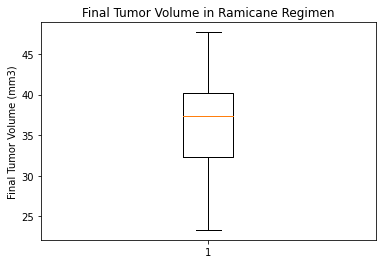

In [186]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()

In [188]:
ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
#ram_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1773,a411,45,38.407618,1,Ramicane,Male,3,22
1,1836,a444,45,43.047543,0,Ramicane,Female,10,25
2,1857,a520,45,38.810366,1,Ramicane,Male,13,21
3,1879,a644,45,32.978522,1,Ramicane,Female,7,17
4,1822,c758,45,33.397653,1,Ramicane,Male,9,17


In [189]:
ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
#ram_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [192]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


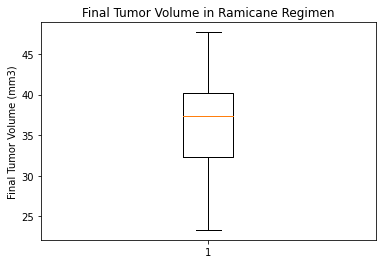

In [195]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()

In [196]:
infu_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]
#infu_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1804,a203,45,67.973419,2,Infubinol,Female,20,23
1,1786,a251,45,65.525743,1,Infubinol,Female,21,25
2,1794,a685,45,66.083066,3,Infubinol,Male,8,30
3,1781,c139,45,72.226731,2,Infubinol,Male,11,28
4,1802,e476,45,62.435404,1,Infubinol,Male,23,26


In [197]:
infu_obj = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
infu_obj

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [198]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


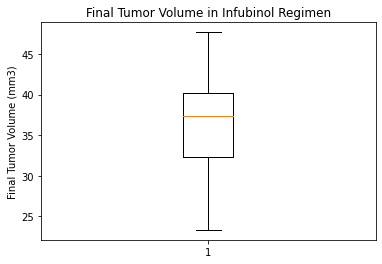

In [203]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()

In [204]:
ceft_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]
#ceft_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1,1772,j296,45,61.849023,3,Ceftamin,Female,24,30
2,1858,k210,45,68.923185,3,Ceftamin,Male,15,28
3,1810,l471,45,67.748662,1,Ceftamin,Female,7,28
4,1765,l661,45,59.851956,3,Ceftamin,Male,18,26


In [207]:
ceft_obj = ceft_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_obj = ceft_obj["Tumor Volume (mm3)"]
#ceft_obj

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [210]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


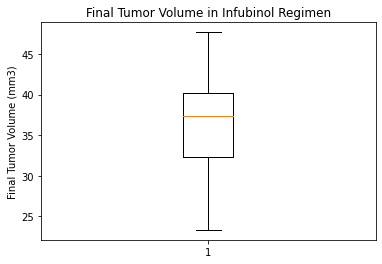

In [212]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()